In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import tensor_utils as utils

np.random.seed(14159)

In [2]:
# Set parameters
c = np.array([0.1, 0.2, 0.7])
N = 1000

d = c.size
ct = (N**(d-2))*np.prod(c[:-1])/c[-1]
setting = "$\\mathbf{{c}} = {{{}}}^\\top$".format(list(np.round(c, 2)))

In [3]:
# Compute asymptotic alignments, phase transition and kernel phase transition
eps_r = np.linspace(0.01, 1, 100)
sigma_r = np.tile(np.linspace(0.1, 5, 1000), (eps_r.size, 1))*eps_r[:, None]
tol = 1e-3

mask = np.zeros_like(sigma_r, dtype=bool)
beta_r = np.empty_like(sigma_r)*np.nan
align_r = np.empty((*sigma_r.shape, c.size))*np.nan
idx_pht = np.zeros_like(eps_r, dtype=int)
beta_pht = np.zeros_like(eps_r)
align_pht = np.zeros((eps_r.size, d))

for i, eps in enumerate(tqdm(eps_r)):
    gg = utils.stieltjes(sigma_r[i], c, eps)
    g, gi = gg['g'].real, gg['gi'].real.T
    mask[i] = (gg['g'].imag < tol)
    if np.any(mask[i]):
        align2 = 1-eps*gi[mask[i]]**2/c
        align_r[i, mask[i]] = np.sqrt(np.where(align2 < 0, np.nan, align2)) # asymptotic alignments
        beta_r[i, mask[i]] = (sigma_r[i, mask[i]]/eps+g[mask[i]])/np.prod(align_r[i, mask[i]], axis=1) # beta(sigma)
        idx_pht[i] = np.argmin(np.isnan(beta_r[i]))
        beta_r[i][:idx_pht[i]] = np.linspace(0, beta_r[i][idx_pht[i]], idx_pht[i])
        sigma_r[i][:idx_pht[i]] = np.nan
        align_r[i][:idx_pht[i]] = 0
    beta_pht[i], align_pht[i] = utils.phase_transition(c, eps) # beta and alignments at phase transition

beta_pht_cubic = np.sqrt(((d-1)/(eps_r*d))*((d-1)/(d-2))**(d-2)) # beta at phase transition in the cubic case
kernel_pht = ct**0.25/np.sqrt(eps_r) # kernel phase transition

100%|██████████| 100/100 [01:21<00:00,  1.22it/s]


In [4]:
i_eps = 24
setting_eps = setting+"$\\quad \\varepsilon = {}$".format(np.round(eps_r[i_eps], 2))

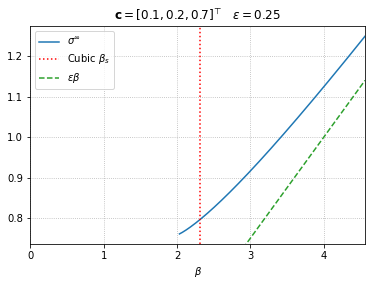

In [5]:
plt.plot(beta_r[i_eps], sigma_r[i_eps], color='C0', label="$\\sigma^\\infty$")
plt.axvline(x=np.sqrt(((d-1)/(eps_r[i_eps]*d))*((d-1)/(d-2))**(d-2)), color='red', ls=':', label="Cubic $\\beta_s$")
ylim = plt.ylim()
plt.plot(beta_r[i_eps], eps_r[i_eps]*beta_r[i_eps], color='C2', ls='--', label="$\\varepsilon \\beta$")
plt.xlim(0, np.nanmax(beta_r[i_eps]))
plt.ylim(*ylim)
plt.grid(ls=':')
plt.xlabel("$\\beta$")
plt.legend()
plt.title(setting_eps);

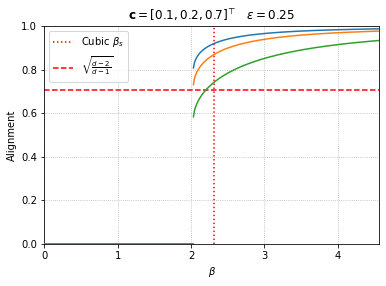

In [6]:
for i in range(d):
    col = 'C'+str(i)
    plt.plot(beta_r[i_eps][:idx_pht[i_eps]], align_r[i_eps][:idx_pht[i_eps]][:, i], color=col, zorder=3)
    plt.plot(beta_r[i_eps][idx_pht[i_eps]:], align_r[i_eps][idx_pht[i_eps]:][:, i], color=col, zorder=3)
plt.axvline(x=np.sqrt(((d-1)/(eps_r[i_eps]*d))*((d-1)/(d-2))**(d-2)), color='red', ls=':', label="Cubic $\\beta_s$", zorder=2)
plt.axhline(y=np.sqrt((d-2)/(d-1)), ls='--', color='red', label="$\\sqrt{\\frac{d-2}{d-1}}$", zorder=2)
plt.grid(ls=':')
plt.xlim(0, np.nanmax(beta_r[i_eps]))
plt.ylim(0, 1)
plt.xlabel("$\\beta$")
plt.ylabel("Alignment")
plt.legend()
plt.title(setting_eps);

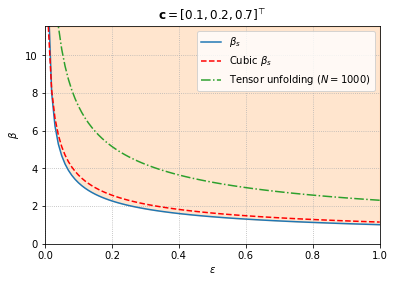

In [7]:
ymax = min(beta_pht.max(), beta_pht_cubic.max(), kernel_pht.max())
plt.plot(eps_r, beta_pht, color='C0', ls='-', label="$\\beta_s$")
plt.plot(eps_r, beta_pht_cubic, color='red', ls='--', label="Cubic $\\beta_s$")
plt.plot(eps_r, kernel_pht, color='C2', ls='-.', label="Tensor unfolding ($N = {}$)".format(N))
plt.fill_between(eps_r, beta_pht, ymax, color='C1', alpha=.2)
plt.grid(ls=':')
plt.xlim(0, 1)
plt.ylim(0, ymax)
plt.xlabel("$\\varepsilon$")
plt.ylabel("$\\beta$")
plt.legend()
plt.title(setting);

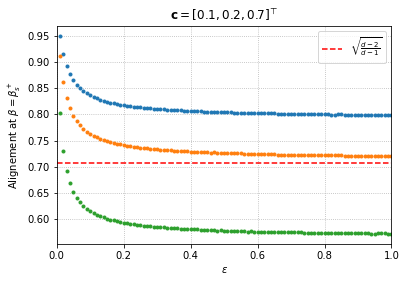

In [8]:
plt.plot(eps_r, align_pht, ls='', marker='.')
plt.axhline(y=np.sqrt((d-2)/(d-1)), ls='--', color='red', label="$\\sqrt{\\frac{d-2}{d-1}}$")
plt.grid(ls=':')
plt.xlim(0, 1)
plt.xlabel("$\\varepsilon$")
plt.ylabel("Alignement at $\\beta = \\beta_s^+$")
plt.legend()
plt.title(setting);